In [25]:
import numpy as np 
import pandas as pd 
import pymysql 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set()
#데이터 분석에 필요한 pandas와 numpy를 import한다.

In [26]:
crime=pd.read_csv("crime_2016.csv",engine='python')
#https://www.data.go.kr/dataset/3074470/fileData.do 에서 다운받은 데이터 불러오기


In [27]:
crime
#데이터 확인 겸 출력

범죄대분류        범죄중분류  생활정도(하류)  생활정도(중류)  생활정도(상류)  생활정도(미상)  혼인관계(유배우자)  \
0     강력범죄         살인기수       236        69         6        78         122   
1     강력범죄        살인미수등       384       135         5        62         175   
2     강력범죄           강도      1412       412        20       155         325   
3     강력범죄           강간      2325      1750        68      1478         964   
4     강력범죄         유사강간       247       178         3       107          96   
5     강력범죄         강제추행      6752      5597       249      1890        5021   
6     강력범죄  기타 강간 강제추행등       363       208         6       109         120   
7     강력범죄           방화      1059       322        10       126         501   
8     절도범죄         절도범죄     64243     29898       738      8287       25367   
9     폭력범죄           상해     35833     20727       626      4873       27441   
10    폭력범죄           폭행     60979     35234      1141     94954       48750   
11    폭력범죄        체포 감금       432       278        18       498         288   
12    폭력범죄           협박      3494      2272        93      3338        2894   
13    폭력범죄        약취 유인       116        42         5        89          56   
14    폭력범죄        폭력행위등     39148     22299       504     11051       22686   
15    폭력범죄           공갈      1346       698        41       845         601   
16    폭력범죄           손괴     17294      9434       383      4638       12099   
17    지능범죄         직무유기        28       136         4       692         157   
18    지능범죄         직권남용        11        79         1       496          80   
19    지능범죄          증수뢰       129       429        57       227         527   
20    지능범죄           통화        81        23         0       182          28   
21    지능범죄        문서 인장      5840      3848       166      9168        4404   
22    지능범죄       유가증권인지       105        55         6       233          96   
23    지능범죄           사기     84091     28513       863    114738       45499   
24    지능범죄           횡령     12564      7018       297     16066        9961   
25    지능범죄           배임      1225      1566       142      5300        2351   
26    풍속범죄        성풍속범죄      5961      4281        96      1579        2700   
27    풍속범죄         도박범죄     18004      9212       215      1735       17249   
28  특별경제범죄       특별경제범죄     41581     18628       683     29464       28170   
29    마약범죄         마약범죄      4508      1569       125       711        2328   
30    보건범죄         보건범죄      9600      6847      1351      2923       11402   
31    환경범죄         환경범죄      1196      1378       185       417        2237   
32    교통범죄         교통범죄    235633    149757      3165    160819      238439   
33    노동범죄         노동범죄      1482       648        36       229        1439   
34    안보범죄         안보범죄        70        71         3        30          55   
35    선거범죄         선거범죄       269       552        92       208         830   
36    병역범죄         병역범죄     12282      5104        71       784        1997   
37    기타범죄         기타범죄    108959     70794      3223     58771       96754   

    혼인관계(동거)  혼인관계(이혼)  혼인관계(사별)  미혼자부모관계(실(양)부모)  미혼자부모관계(계부모)  \
0         18        59        12               45             0   
1         27       115        20              105             0   
2         38       166        13              843             3   
3         90       451        43             1845             9   
4         12        44         3              185             0   
5        223      1148       219             4201            17   
6         15        56        10              253             2   
7         81       228        38              274             2   
8       1397      8198      2524            39488           195   
9       1848      6590      1337            13991           105   
10      4129     10104      1775            22485           145   
11        27       127        11              195             0   
12       259       940        99             1067   

In [78]:
#한글 오류 해결
plt.rc('font', family='Malgun Gothic')
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [29]:
#데이터 개요 확인
print('----------------범죄 정보-------------------')
print(crime.info())

----------------범죄 정보-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   범죄대분류            38 non-null     object
 1   범죄중분류            38 non-null     object
 2   생활정도(하류)         38 non-null     int64 
 3   생활정도(중류)         38 non-null     int64 
 4   생활정도(상류)         38 non-null     int64 
 5   생활정도(미상)         38 non-null     int64 
 6   혼인관계(유배우자)       38 non-null     int64 
 7   혼인관계(동거)         38 non-null     int64 
 8   혼인관계(이혼)         38 non-null     int64 
 9   혼인관계(사별)         38 non-null     int64 
 10  미혼자부모관계(실(양)부모)  38 non-null     int64 
 11  미혼자부모관계(계부모)     38 non-null     int64 
 12  미혼자부모관계(실부계모)    38 non-null     int64 
 13  미혼자부모관계(실부무모)    38 non-null     int64 
 14  미혼자부모관계(실모계부)    38 non-null     int64 
 15  미혼자부모관계(실모무부)    38 non-null     int64 
 16  미혼자부모관계(계부무모)    38 non-null     int64 
 

In [72]:
#범죄와 상관없이 생활 정도별로 각 범죄별 데이터의 합계를 구함
from pandas import Series, DataFrame
low=crime['생활정도(하류)'].sum()
mid=crime['생활정도(중류)'].sum()
high=crime['생활정도(상류)'].sum()


In [58]:
#생활정도에 따른 범죄별 데이터의 총합을 data frame으로 생성
from pandas import Series, DataFrame
low=crime['생활정도(하류)'].sum()
mid=crime['생활정도(중류)'].sum()
high=crime['생활정도(상류)'].sum()
data=[['하류', low],['중류', mid], ['상류',high]]
df=pd.DataFrame(data, columns=['life_level','sum'])
print(df.to_numpy())

[['하류' 779282]
 ['중류' 440061]
 ['상류' 14697]]


In [81]:
#파이차트를 생성하기 위해 그룹으로 나누어 준다
group_names = ['하류', '중류', '상류']

group_sizes = [crime['생활정도(하류)'].sum(), crime['생활정도(중류)'].sum(), crime['생활정도(상류)'].sum()]

group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral']

group_explodes = (0.1, 0, 0) # explode 1st slice


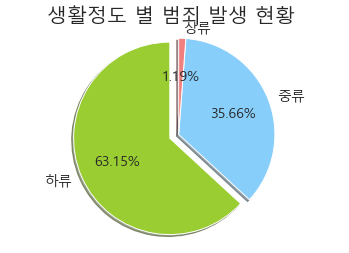

In [82]:
#파이차트 생성
plt.pie(group_sizes, 

        explode=group_explodes, 

        labels=group_names, 

        colors=group_colors, 

        autopct='%1.2f%%', # second decimal place

        shadow=True, 

        startangle=90,

        textprops={'fontsize': 14}) # text font size

plt.axis('equal') #  equal length of X and Y axis

plt.title('생활정도 별 범죄 발생 현황 ', fontsize=20)

plt.show()


In [74]:
#각 범죄 카테고리별 전체 범죄 건수를 합한다. 
crime['합계'] = crime['생활정도(하류)']+crime['생활정도(중류)']+crime['생활정도(상류)']+crime['생활정도(미상)']
print(crime['합계'])

0        389
1        586
2       1999
3       5621
4        535
5      14488
6        686
7       1517
8     103166
9      62059
10    192308
11      1226
12      9197
13       252
14     73002
15      2930
16     31749
17       860
18       587
19       842
20       286
21     19022
22       399
23    228205
24     35945
25      8233
26     11917
27     29166
28     90356
29      6913
30     20721
31      3176
32    549374
33      2395
34       174
35      1121
36     18241
37    241747
Name: 합계, dtype: int64


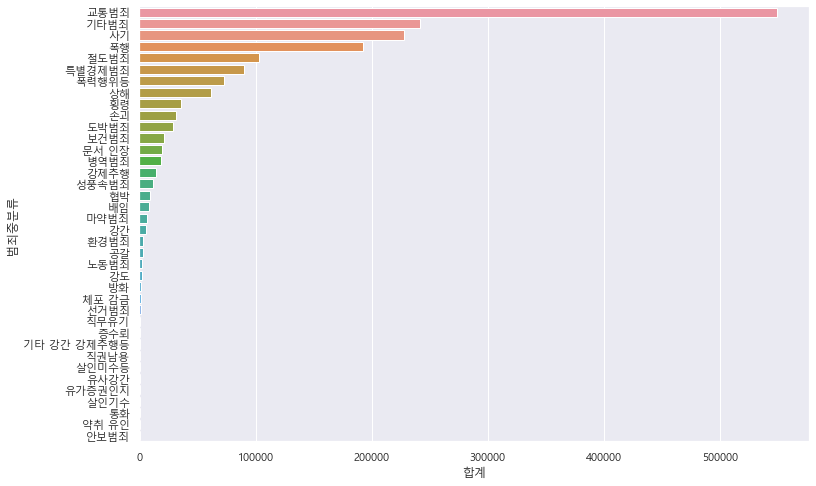

In [79]:
#범죄별 건수를 막대그래프로 표현한다.
plt.figure(figsize=(12,8)) #size 조절 
plt.xticks(rotation = 0) #x축 조절 
sns.barplot( data = crime.sort_values(by='합계', ascending=False), x = "합계", y = "범죄중분류" ) 
plt.show()
